In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(" sucessfully")

 sucessfully


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
print(" imported suscessfully")

 imported suscessfully


In [3]:
df=pd.read_csv("E:\\6th semmmm\\feature engineering datasets\\handlings the miossing datas\\titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.shape

(891, 4)

In [5]:
# to see how many null values in pour datasets 
df.isnull().sum()/df.shape[0]*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
# find the m,issing data from the means 
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
# perform the train test splits 
x=df.drop(columns=['Survived'])
y=df['Survived']


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [9]:
print(x_train.shape,x_test.shape)

(712, 3) (179, 3)


In [10]:
print(y_train.shape,y_test.shape)

(712,) (179,)


In [11]:
# make the 2 column and addd the two columns with the arbitary value maximum and the minimum
x_train['age_99']=x_train['Age'].fillna(99)
x_train['age_minus1']=x_train['Age'].fillna(-1)

# fill in the fare columns 
x_train['fare_999']=x_train['Fare'].fillna(99)
x_train['fare_minus1']=x_train['Fare'].fillna(-1)

In [12]:
x_train.head()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [13]:
x_train.isnull().sum()  # we cant do any value in the original age columns 

Age            148
Fare            36
Family           0
age_99           0
age_minus1       0
fare_999         0
fare_minus1      0
dtype: int64

In [15]:
# to see the variance in the age and the fare before and the after 
print("age")
print(" original age variable varience : ", x_train['Age'].var())
print(" age variable 99 varience : ", x_train['age_99'].var())
print("  age variable minus 1 varience : ", x_train['age_minus1'].var())

print(" fare \n")
print(" original faare variable varience : ", x_train['Fare'].var())
print(" fare  variable 999 varience : ", x_train['fare_999'].var())
print(" fare variable minus1 variable varience : ", x_train['fare_minus1'].var())


age
 original age variable varience :  204.3495133904614
 age variable 99 varience :  951.7275570187172
  age variable minus 1 varience :  318.0896202624484
 fare 

 original faare variable varience :  2448.197913706318
 fare  variable 999 varience :  2536.0773428319685
 fare variable minus1 variable varience :  2378.5676784883503


# comparisions of the different variences

In [16]:
x_train.cov()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
fare_999,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [19]:
# to see the correlation 
x_train.corr()

,Age,Fare,Family,age_99,age_minus1,fare_999,fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
fare_999,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


# see the visualizations 

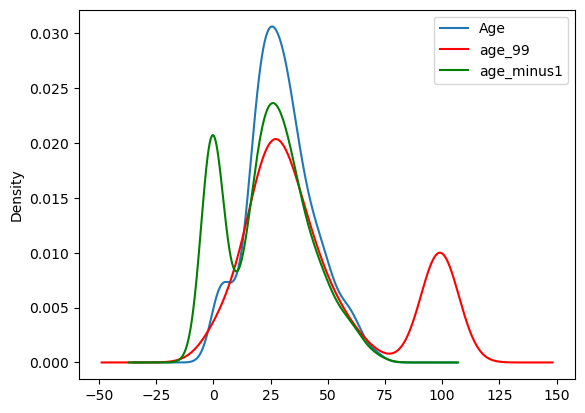

In [20]:
# see the demonstrationm about the age cpolumns 
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distributions
x_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the 99
x_train['age_99'].plot(kind='kde',ax=ax,color='red')

#variables with the imputed with the minus 1
x_train['age_minus1'].plot(kind='kde',ax=ax,color='green')

# add the legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()
# we have to perform this operartion where our data is not missing at the randoms 
# if our datas are missing at the chunks we will use this technique for handling the missimng variables 

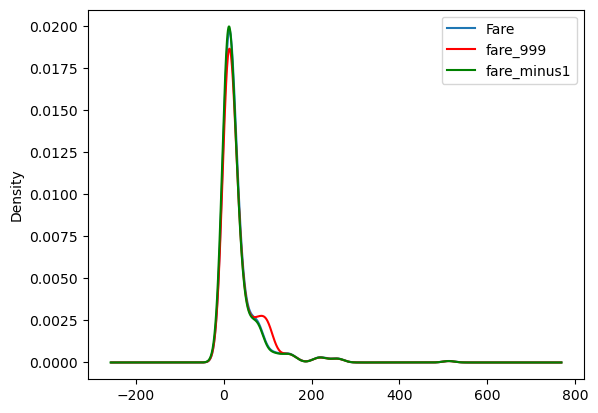

In [22]:
# see the demonstrartion for the fare columns 
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distributions
x_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with the 99
x_train['fare_999'].plot(kind='kde',ax=ax,color='red')

#variables with the imputed with the minus 1
x_train['fare_minus1'].plot(kind='kde',ax=ax,color='green')

# add the legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()
# there is no more fare data are missing so the lines are overlappingws 

In [24]:
x_train.columns

Index(['Age', 'Fare', 'Family', 'age_99', 'age_minus1', 'fare_999',
       'fare_minus1'],
      dtype='object')

# compute the missing datas using the sklearn

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
x_train.head()

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


In [28]:
# code for imputiongs 
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)


In [29]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')
print("transforms sucessfully")

transforms sucessfully


In [30]:
trf.fit(x_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [31]:
# to check the valuyes we have filled with the we can check from the statistics
trf.named_transformers_['imputer1'].statistics_
# we have filled the imputer 1 with the value of the 99

array([99.])

In [32]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [34]:
# transform the datas 
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)
print(" transform sucessfully")

 transform sucessfully


In [35]:
x_train  # we have to convbert the numpy array into the dataframes 

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [36]:
x_train[0]

array([40.    , 27.7208,  0.    ])

In [43]:
x_train=pd.DataFrame(x_train,columns=['age','fare','family'])
x_test=pd.DataFrame(x_test,columns=['age','fare','family'])
print("sucessfully chyanged into the dataframes ")

sucessfully chyanged into the dataframes 


In [45]:
x_train.isnull().sum()

age       0
fare      0
family    0
dtype: int64

In [46]:
x_train.head(2)

,age,fare,family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0


<AxesSubplot:ylabel='Density'>

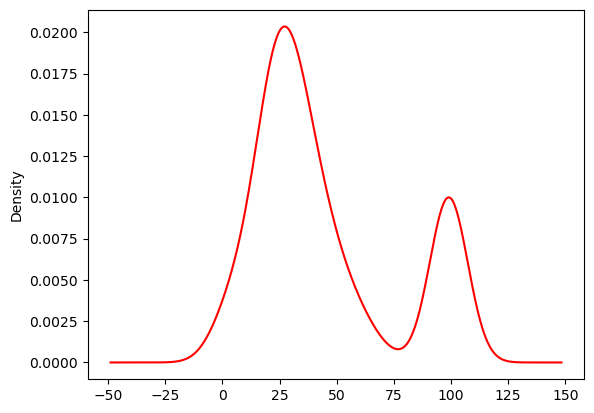

In [49]:
#$ to demonstrate the kde plot after computtiong the missing datasts
# for the age 
x_train['age'].plot(kind='kde',color='red')
# we fi8ll the 19 percent of the data on the 99 so the graph is up in the range of the 99

<AxesSubplot:ylabel='Density'>

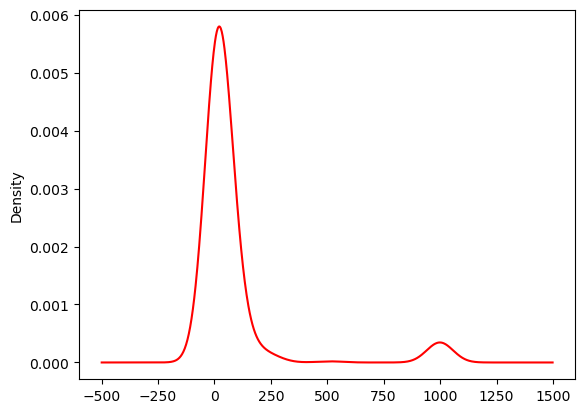

In [50]:
# similarly with the fare columns 
x_train['fare'].plot(kind='kde',color='red')
# the missing data of the fare columns is less so there is no big impact missing with the arbitary values 